In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np

TWO_PI = math.pi*2
ONE_OVER_PI = 1/math.pi

In [23]:
# xi - vec2, normal - vec3
# result is in global space
# PDF=1
def SampleUniformHemisphere(xi, normal):
    theta = TWO_PI * xi[0] # Transform Random number from [0, 1] to [0, 2pi]
    u     = 2 * xi[1] - 1  # Transform Random number from [0, 1] to [-1, 1]
    r     = math.sqrt(1 - u*u)
    direction = normal + np.array([r * math.cos(theta), r * math.sin(theta), u])
    return direction/np.linalg.norm(direction) # normalise

# xi - vec2
# result is in local space
# PDF=result.z/PI
def SampleCosineHemisphere(xi):
    xi = np.clip(xi, 0.001, 0.999)
    a = math.sqrt(xi[0])
    b = TWO_PI * xi[1]
    result = np.array([a * math.cos(b), a * math.sin(b), math.sqrt(1 - xi[0])])
    return result


In [8]:
def UniformDistributedVec2():
    return np.array([np.random.uniform(), np.random.uniform()])

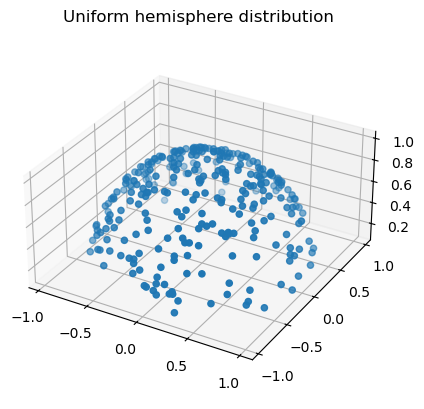

In [22]:
num_samples = 300
normal = np.array([0,0,1]) # up

uniform = np.array([SampleUniformHemisphere(UniformDistributedVec2(), normal) for i in range(num_samples)])
xs, ys, zs = uniform.reshape(-1, 3).T # split an array of vec3 into 3 arrays of floats, because that's what matplotlib wants

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("Uniform hemisphere distribution")
ax.set_box_aspect(aspect=(1, 1, 0.5))
ax.scatter(xs, ys, zs)
plt.show()

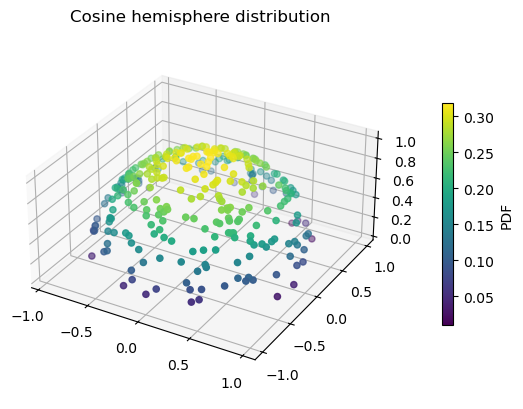

In [53]:
cosine = np.array([SampleCosineHemisphere(UniformDistributedVec2()) for i in range(num_samples)])
xs, ys, zs = cosine.reshape(-1, 3).T # split an array of vec3 into 3 arrays of floats, because that's what matplotlib wants
pdfs = zs / math.pi # look up SampleCosineHemisphere comment

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("Cosine hemisphere distribution")
ax.set_box_aspect(aspect=(1, 1, 0.5))
sc = ax.scatter(xs, ys, zs, c = pdfs)
plt.colorbar(sc, label="PDF", shrink=0.6, anchor=(0.5,0.5))

plt.show()

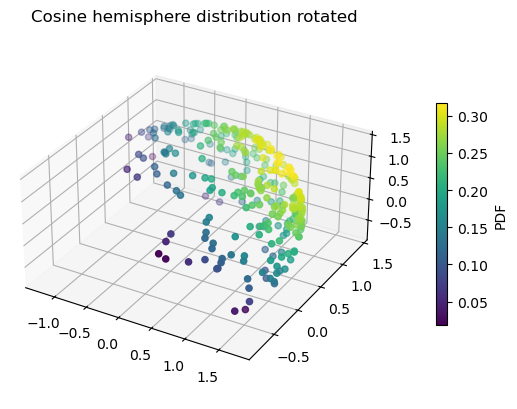

In [79]:
def ComputeBasisFromVector(normal):
    if abs(normal[1]) < 0.999:
        up = np.array([0, 1, 0])
    else:
        up = np.array([1, 0, 0])

    xAxis = np.cross(up, normal)
    xAxis = xAxis/np.linalg.norm(xAxis) # normalise
    yAxis = np.cross(normal, xAxis)
    zAxis = normal

    matrix = np.identity(3)

    matrix[:,0] = xAxis
    matrix[:,1] = yAxis
    matrix[:,2] = zAxis

    return matrix
    # return np.matmul(matrix, normal)

rotate_dir = np.array([1,1,1])
transform = ComputeBasisFromVector(rotate_dir)

cosine = np.array([SampleCosineHemisphere(UniformDistributedVec2()) for i in range(num_samples)])
xs, ys, zs = cosine.reshape(-1, 3).T # split an array of vec3 into 3 arrays of floats, because that's what matplotlib wants
pdfs = zs / math.pi # look up SampleCosineHemisphere comment
cosine = np.array([np.matmul(transform, sample) for sample in cosine])
xs, ys, zs = cosine.reshape(-1, 3).T # split an array of vec3 into 3 arrays of floats, because that's what matplotlib wants

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("Cosine hemisphere distribution rotated")
ax.set_box_aspect(aspect=(1, 1, 0.5))
sc = ax.scatter(xs, ys, zs, c = pdfs)
plt.colorbar(sc, label="PDF", shrink=0.6, anchor=(0.5,0.5))

plt.show()